# Saneamento Teresina-PI

-- Os Dados usados nesse breve estudo São públicos , e estão disponíveis para consulta ! 

Convênios e outros acordos  (09 - 19)
http://www.portaltransparencia.gov.br/convenios/consulta?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&periodoLiberacaoRecursosDe=01%2F01%2F2009&periodoLiberacaoRecursosAte=30%2F11%2F2019&periodoVigenciaDe=01%2F01%2F2009&periodoVigenciaAte=30%2F11%2F2019&uf=PI&municipio=21280&funcaoSubfuncao=SB512&colunasSelecionadas=linkDetalhamento%2CnumeroConvenio%2CnumeroOriginal%2Cuf%2CmunicipioConvenente%2Csituacao%2CtipoTransferencia%2Cobjetivo%2CorgaoSuperior%2Corgao%2Cconcedente%2Cconvenente%2CdataInicioVigencia%2CdataFimVigencia%2CvalorCelebrado&ordenarPor=orgao&direcao=desc

Emendas(09 - 19)
http://www.portaltransparencia.gov.br/emendas/consulta?ordenarPor=localidadeDoGasto&direcao=asc

Transferências(09 - 19)
http://www.portaltransparencia.gov.br/transferencias/consulta?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&de=01%2F01%2F2009&ate=30%2F11%2F2019&uf=PI&municipio=21280&funcao=17&colunasSelecionadas=linkDetalhamento%2Cuf%2Cmunicipio%2Ctipo%2CtipoFavorecido%2Cacao%2ClinguagemCidada%2CgrupoDespesa%2CelementoDespesa%2CmodalidadeDespesa%2Cvalor&ordenarPor=mesAno&direcao=desc

In [1]:
import pandas as pd  

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

- Importamos Todos os DataSets

In [4]:
conv_df = pd.read_excel("convenio.xlsx") # Dados de 2009 ~ 2019 

In [5]:
transf_df = pd.read_excel("transferencia.xlsx")  # Dados de 2009 ~ 2019 

In [6]:
emen_df = pd.read_excel("emendaspi.xlsx") # Dados de 2009 ~ 2019 

- Iniciando pelo menor DataSet

In [7]:
emen_df # Emendas

,Ano,Nome do autor,Número da emenda,Localidade do gasto (Regionalização),Função,Subfunção,Valor empenhado,Valor liquidado,Valor pago
0,2016,PAES LANDIM,3,PIAUÍ,Saúde,Saneamento básico urbano,300000,0,0
1,2016,REGINA SOUSA,16,PIAUÍ,Saúde,Saneamento básico urbano,1065806,0,0
2,2017,PAES LANDIM,3,PIAUÍ,Saúde,Saneamento básico urbano,1200000,0,0
3,2017,REGINA SOUSA,17,PIAUÍ,Saúde,Saneamento básico urbano,1600000,0,0
4,2018,PAES LANDIM,6,PIAUÍ,Saúde,Saneamento básico urbano,1981136,8730,8730
5,2016,REGINA SOUSA,1,PIAUÍ,Saúde,Saneamento básico urbano,2131612,0,0
6,2016,SILAS FREIRE,3,PIAUÍ,Saúde,Saneamento básico urbano,2322870,0,0
7,2018,ATILA LIRA,6,PIAUÍ,Saúde,Saneamento básico urbano,2600000,9000,9000


- Buscando algumas Informações

In [8]:
emen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Ano                                     8 non-null int64
Nome do autor                           8 non-null object
Número da emenda                        8 non-null int64
Localidade do gasto (Regionalização)    8 non-null object
Função                                  8 non-null object
Subfunção                               8 non-null object
Valor empenhado                         8 non-null int64
Valor liquidado                         8 non-null int64
Valor pago                              8 non-null int64
dtypes: int64(5), object(4)
memory usage: 656.0+ bytes


- O empenho da despesa é um ato administrativo. Isto significa que o empenho em si não cria a obrigação de pagamento, ou seja, não gera um passivo em termos patrimoniais. Assim, a obrigação de pagamento só surge após a etapa da liquidação (segunda etapa da execução orçamentária da despesa). 

In [9]:
total_emp_emen = emen_df['Valor empenhado'].sum() 

In [10]:
total_emp_emen # Valor em Reais 

13201424

- Empenhos em Forma de Histograma

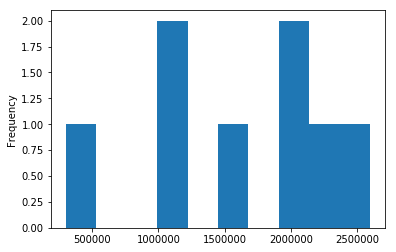

In [53]:
emen_df['Valor empenhado'].plot.hist()

- liquidação é quando se verifica que o governo recebeu aquilo que comprou. Ou seja, quando se confere que o bem foi entregue corretamente ou que a etapa da obra foi concluída como acordado.

In [12]:
total_liq_emen = emen_df['Valor liquidado'].sum()

In [13]:
total_liq_emen # Valor em Reais R$

17730

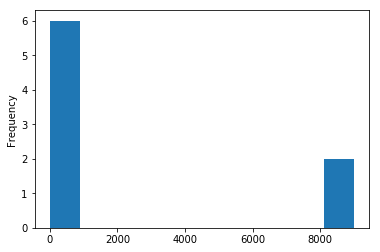

In [14]:
emen_df['Valor liquidado'].plot.hist()

In [15]:
dif_liqxemp_emen = total_liq_emen - total_emp_emen

In [16]:
dif_liqxemp_emen

-13183694

Text(0.5,1,'Comparação Anual Valores Empenhados x Liquidados')

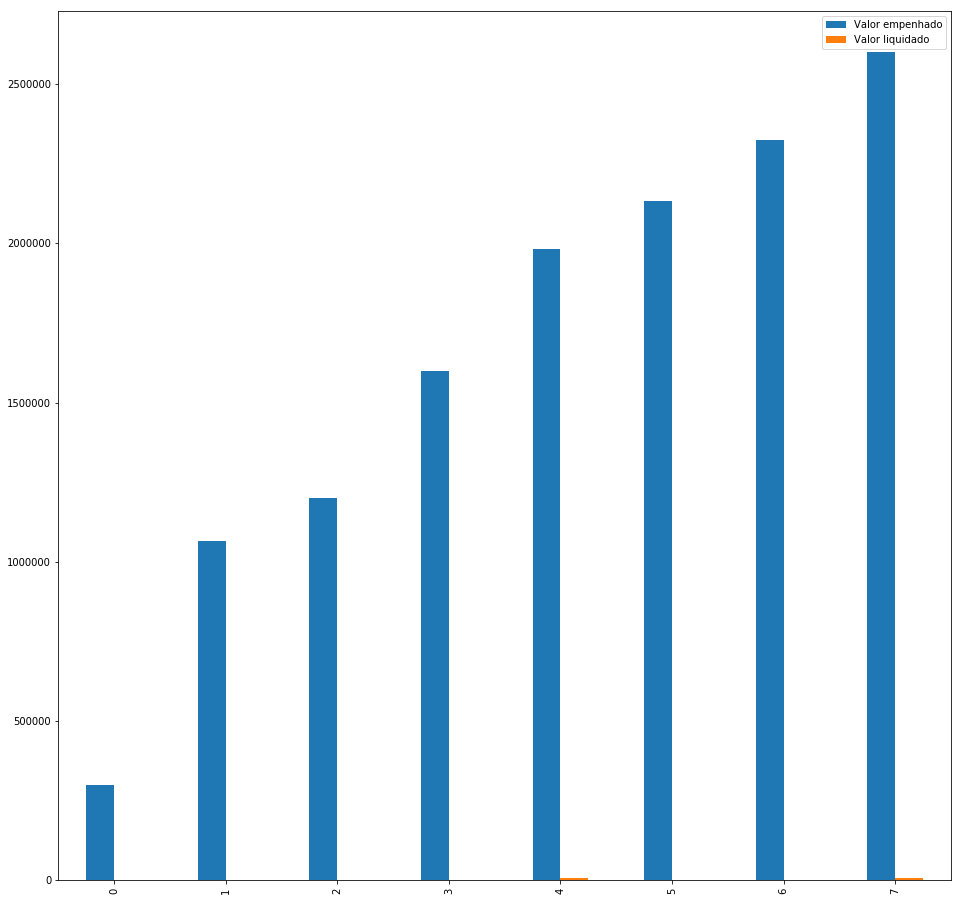

In [38]:
plo = emen_df[["Valor empenhado","Valor liquidado"]].plot(figsize=(16,16),kind = 'bar')

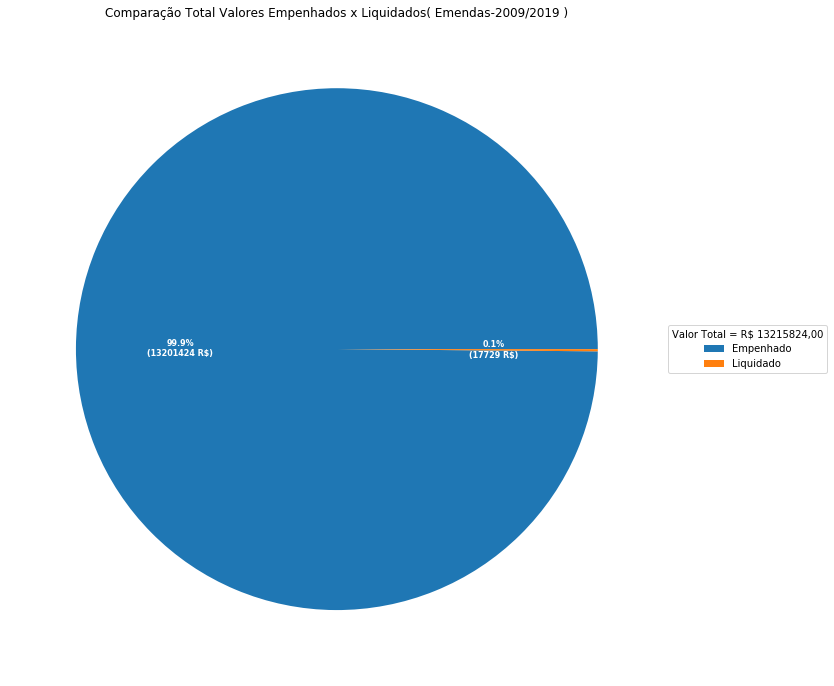

In [57]:
fig, ax = plt.subplots(figsize=(22, 12), subplot_kw=dict(aspect="equal"))

recipe = ["13201424.00 R$ Valor Empenhado",
          " 17730.00 R$ Valor Liquidado"]

data = [float(x.split()[0]) for x in recipe]
valores = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} R$)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Valor Total = R$ 13215824,00",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Comparação Total Valores Empenhados x Liquidados( Emendas-2009/2019 )")

plt.show()

- Convênio administrativo, na administração pública brasileira,
se refere a acordos firmados entre uma entidade da administração
pública federal e uma entidade pública estadual, distrital ou 
municipal da administração direta ou indireta ou entidades
particulares sem fins lucrativos, para realização de objetivos 
de interesse comum entre os participantes (chamados de partícipes)

In [47]:
conv_df

,Número,Número Original,UF,Município,Situação,Tipo de Instrumento,Objeto,Órgão Superior,Órgão/Entidade vinculada,Concedente,Convenente,Data de início da vigência,Data de fim da vigência,Valor Celebrado (R$)
0,593585,CR.NR.0218090-94,PI,TERESINA,INADIMPLÊNCIA SUSPENSA,CONTRATO DE REPASSE,INTERVENCAO NOS SISTEMAS DE ABASTECIMENTO DE A...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-09-10,2017-05-08,24935041.80
1,607517,CR.NR.0237817-77,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DE SISTEMA ABASTECIMENTO DE AGUA DE ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-06-30,5579200.00
2,607518,CR.NR.0238154-82,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DO SISTEMA DE ABASTECIMENTO DE AGUA ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-03-30,6110062.01
3,648108,TC/PAC 0603/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2017-03-03,402490.99
4,649609,TC/PAC 0642/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA MUNICIPIO D...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-01-06,400000.00
5,649621,TC/PAC 0604/08,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-10-20,400000.00
6,658222,TC/PAC 0333/09,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-06-09,374473.32
7,658549,TC/PAC 0866/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUÇÃO DE SISTEMA DE ABASTECIMENTO DE ÁGUA P...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-05-05,800000.00
8,658552,TC/PAC 0315/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUCAO DE SISTEMAS DE ABASTECIMENTO DE ÁGUA ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-12-15,500000.00
9,658562,TC/PAC 0327/09,PI,TERESINA,CONCLUÍDO,Sem informação,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-10-16,379500.87


- Buscando Algumas informações sobre o Novo DataSet

In [58]:
conv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
Número                        35 non-null int64
Número Original               35 non-null object
UF                            35 non-null object
Município                     35 non-null object
Situação                      35 non-null object
Tipo de Instrumento           35 non-null object
Objeto                        35 non-null object
Órgão Superior                35 non-null object
Órgão/Entidade vinculada      35 non-null object
Concedente                    35 non-null object
Convenente                    35 non-null object
Data de início da vigência    35 non-null datetime64[ns]
Data de fim da vigência       35 non-null datetime64[ns]
Valor Celebrado (R$)          35 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 3.9+ KB
